# IN_SYS - SW09 Exercise 2
# Clustering Analysis : k-Means and DBSCAN on Iris Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis.

The data set consists of 50 samples from different species of Iris. Four features were measured from each sample: the length and the width of the sepals (Kelchblätter) and petals (Kronblätter), in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.



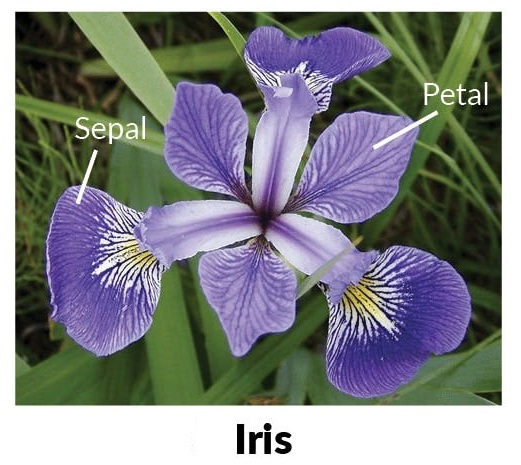


# Preparations

You might need to install the Plotly :  
`!pip install plotly`

## Import necessary libraries

In [56]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

Only on Windows 11 - in case you get an error saying that you should set the environment parameter "LOKY_MAX_CPU_COUNT" :  

`import os`  
`os.environ["LOKY_MAX_CPU_COUNT"] = "4"`

## Set parameters for plots

In [57]:
# Set the Plotly renderer for interactive plots
pio.renderers.default = 'iframe'

# Set up Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

## Load and display Iris dataset

In [58]:
# Load the Iris dataset (use the correct file path)
iris = pd.read_csv('IRIS_05.csv', encoding='utf-8')

# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width
0           6.1          2.8           4.7          1.2
1           5.7          3.8           1.7          0.3
2           7.7          2.6           6.9          2.3
3           6.0          2.9           4.5          1.5
4           6.8          2.8           4.8          1.4


## Visualize relationships between the features with Seaborn Pairplot

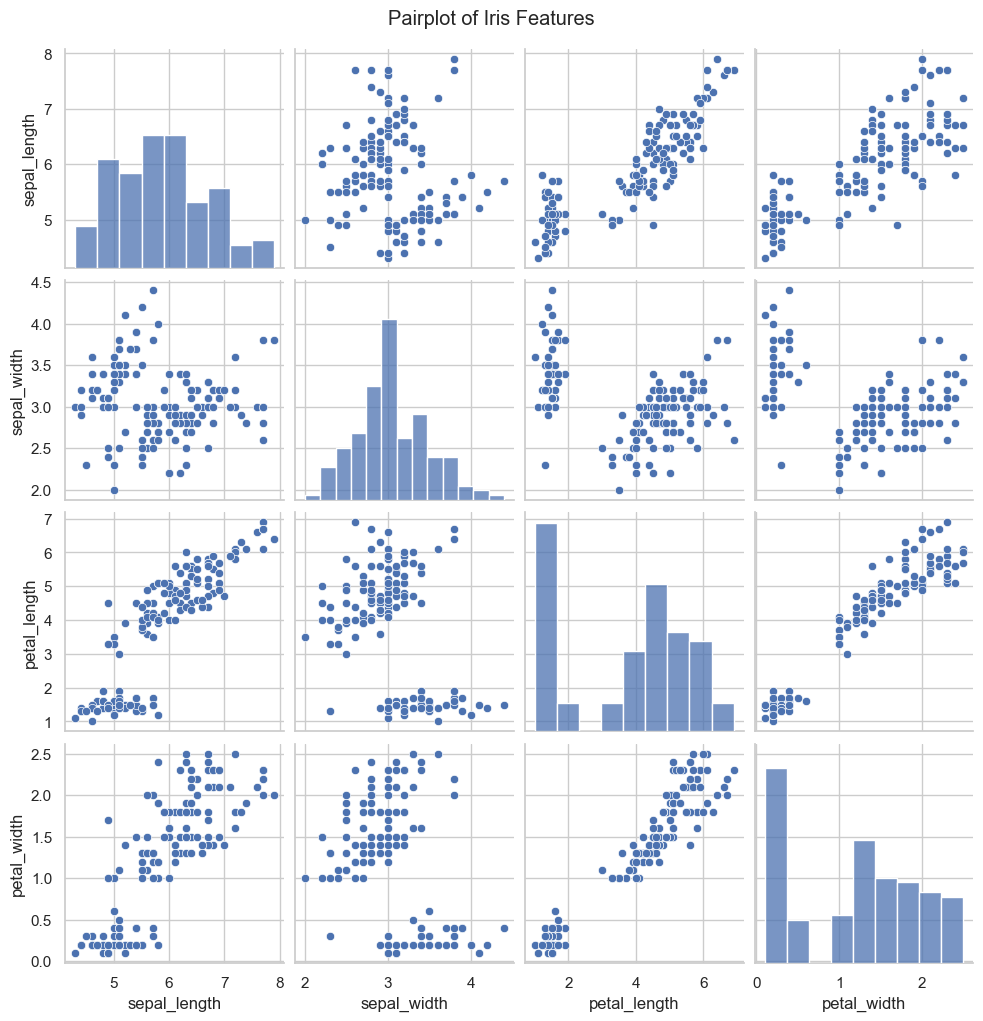

In [59]:
sns.pairplot(iris, diag_kind="hist")
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

## Standardize the data for k-Means clustering

In [60]:
# It is good practice to standardize data for clustering algorithms like k-Means. For this data set not really 
# necessary, you would get good results without. But here included to introduce it, we will use it later more often.

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris)
iris_standardized = pd.DataFrame(iris_scaled, columns=iris.columns)
iris_standardized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.310998,-0.587764,0.535296,0.001753
1,-0.173674,1.726266,-1.170675,-1.181504
2,2.249683,-1.050569,1.786341,1.447956
3,0.189830,-0.356361,0.421564,0.396172
4,1.159173,-0.587764,0.592162,0.264699


# k-Means clustering method

## We will try k-Means algorithm with 5 clusters

In [61]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
iris_standardized['Cluster'] = kmeans_5.fit_predict(iris_standardized)

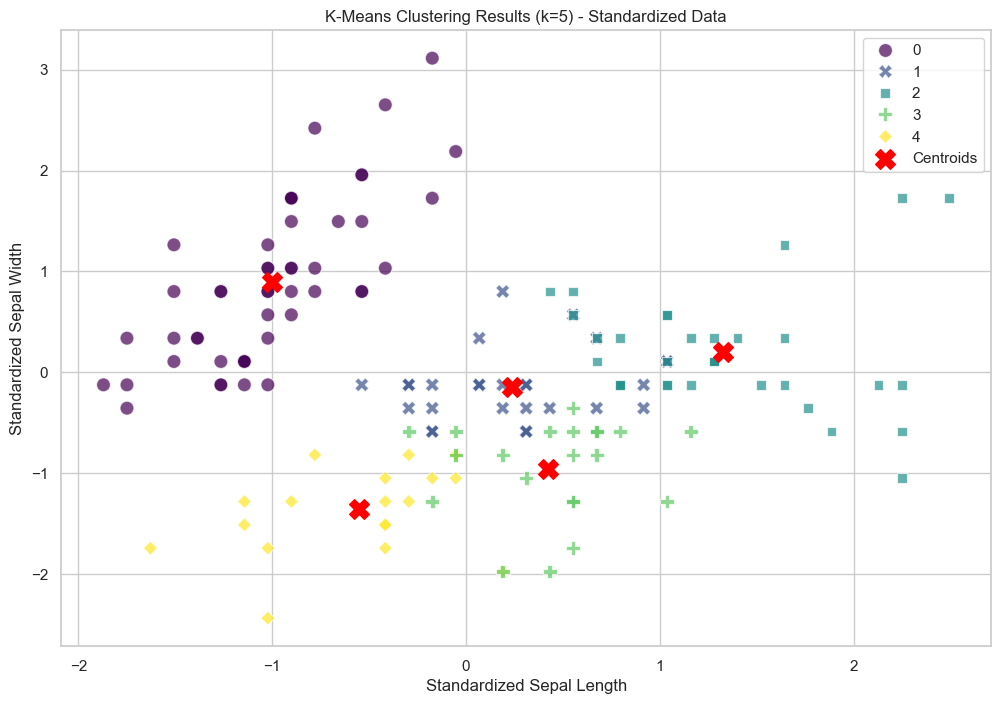

In [62]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='sepal_length', y='sepal_width', data=iris_standardized,
    hue='Cluster', palette='viridis', style='Cluster', s=100, alpha=0.7
)

plt.scatter(
    kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)

plt.title('K-Means Clustering Results (k=5) - Standardized Data')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.legend()
plt.show()

## Maybe we can do better. Use the Elbow Method to find the optimal number of clusters

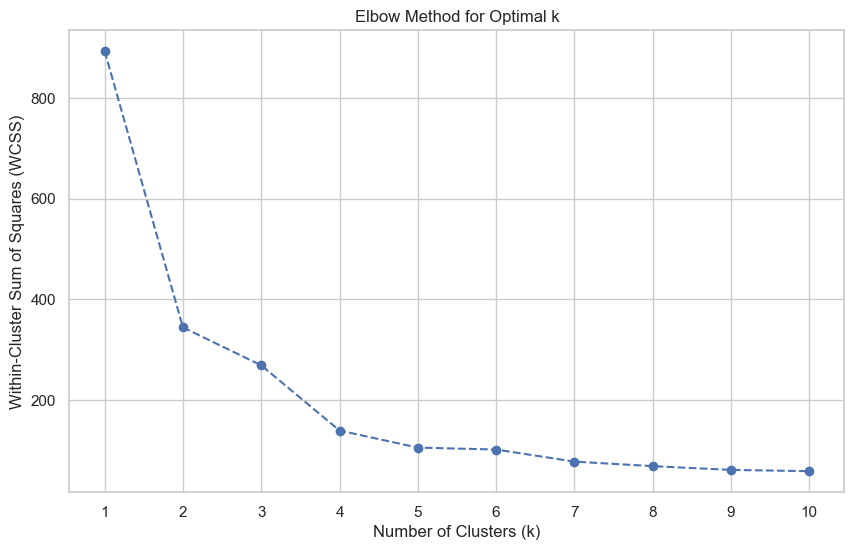

In [63]:
wcss = []  # List to store "Within-Cluster Sum of Squares" - a parameter showing how good the cluster is, for each k

# Calculate WCSS for k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.show()

## Now, run k-Means clustering with k=3, based on the Elbow Method above

In [64]:
kmeans = KMeans(n_clusters=3, random_state=42)
iris_standardized['Cluster'] = kmeans.fit_predict(iris_standardized)

## Scatter plot to visualize the clustering results in 2D

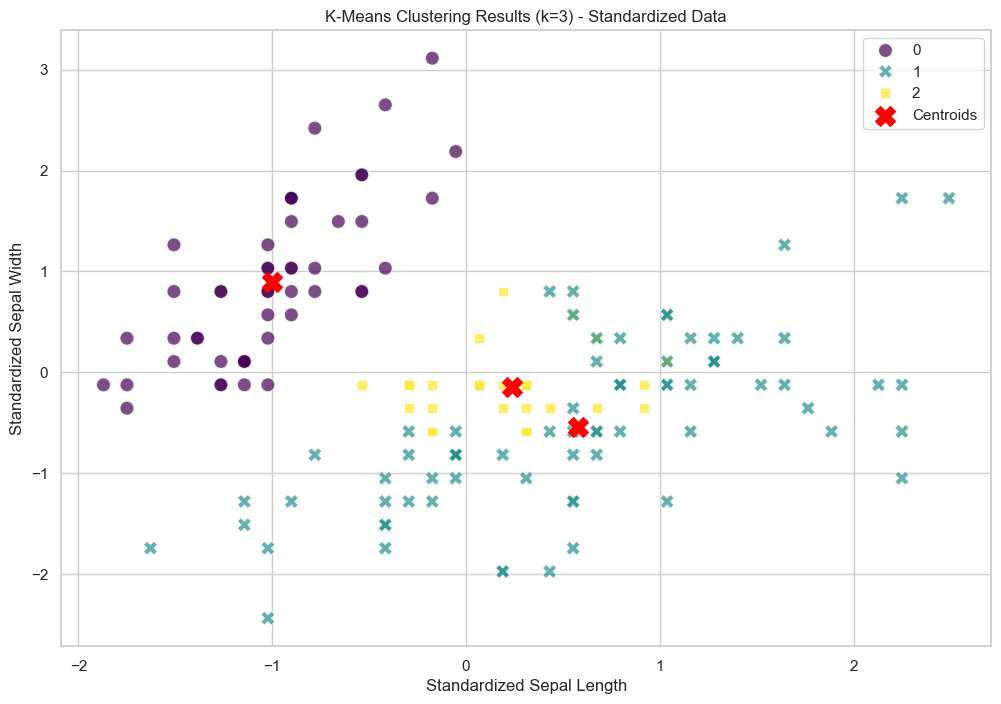

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='sepal_length', y='sepal_width', data=iris_standardized,
    hue='Cluster', palette='viridis', style='Cluster', s=100, alpha=0.7
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='red', marker='X', s=200, label='Centroids'
)
plt.title('K-Means Clustering Results (k=3) - Standardized Data')
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized Sepal Width')
plt.legend()
plt.show()

# 3D visualizations

## Create a 3D plot for clustering results using Matplotlib

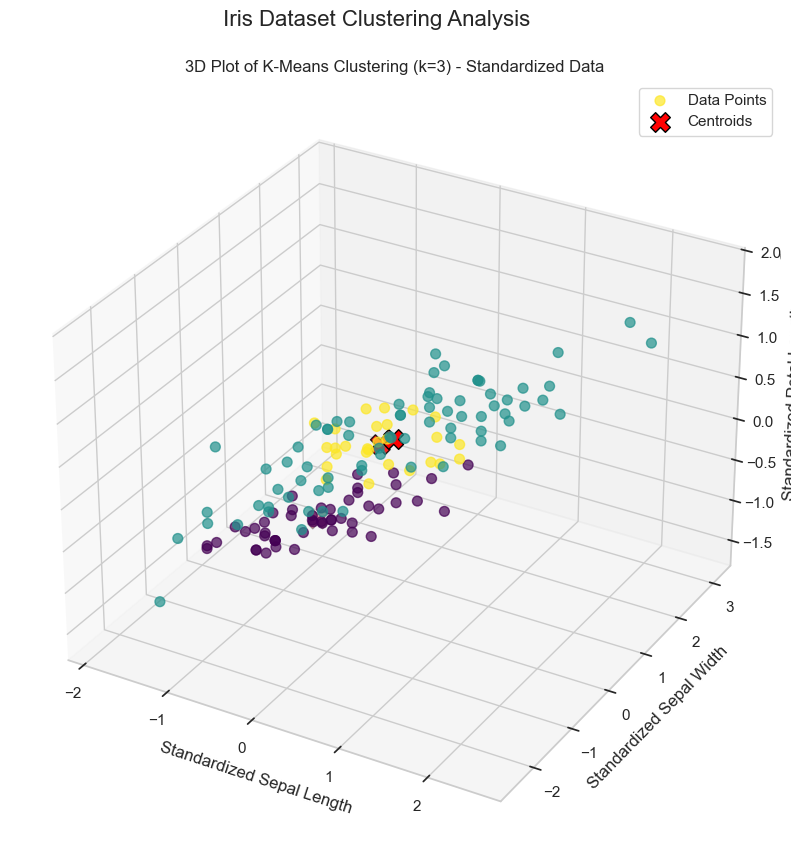

In [66]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': '3d'})

ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    iris_standardized['sepal_length'], iris_standardized['sepal_width'], iris_standardized['petal_length'],
    c=iris_standardized['Cluster'], cmap='viridis', s=50, alpha=0.7, label='Data Points'
)
ax.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
    c='red', marker='X', s=200, label='Centroids', edgecolors='black'
)
ax.set_title('3D Plot of K-Means Clustering (k=3) - Standardized Data')
ax.set_xlabel('Standardized Sepal Length')
ax.set_ylabel('Standardized Sepal Width')
ax.set_zlabel('Standardized Petal Length')
ax.legend()
fig.suptitle('Iris Dataset Clustering Analysis', fontsize=16, y=0.95)
plt.show()

## Create an interactive 3D plot using Plotly

In [80]:
fig = px.scatter_3d(
    iris_standardized, x='sepal_length', y='sepal_width', z='petal_length',
    color='Cluster', title='Interactive 3D Plot of K-Means Clustering (k=3)',
    labels={'sepal_length': 'Standardized Sepal Length',
            'sepal_width': 'Standardized Sepal Width',
            'petal_length': 'Standardized Petal Length'
    },
    width=2000,
    height=1000,
    opacity=0.7
)
centroids = kmeans.cluster_centers_
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
        mode='markers', marker=dict(size=12, color='red', symbol='x'),
        name='Cluster Centroids'
    )
)
fig.show()

# DBSCAN Clustering - comparison with k-Means

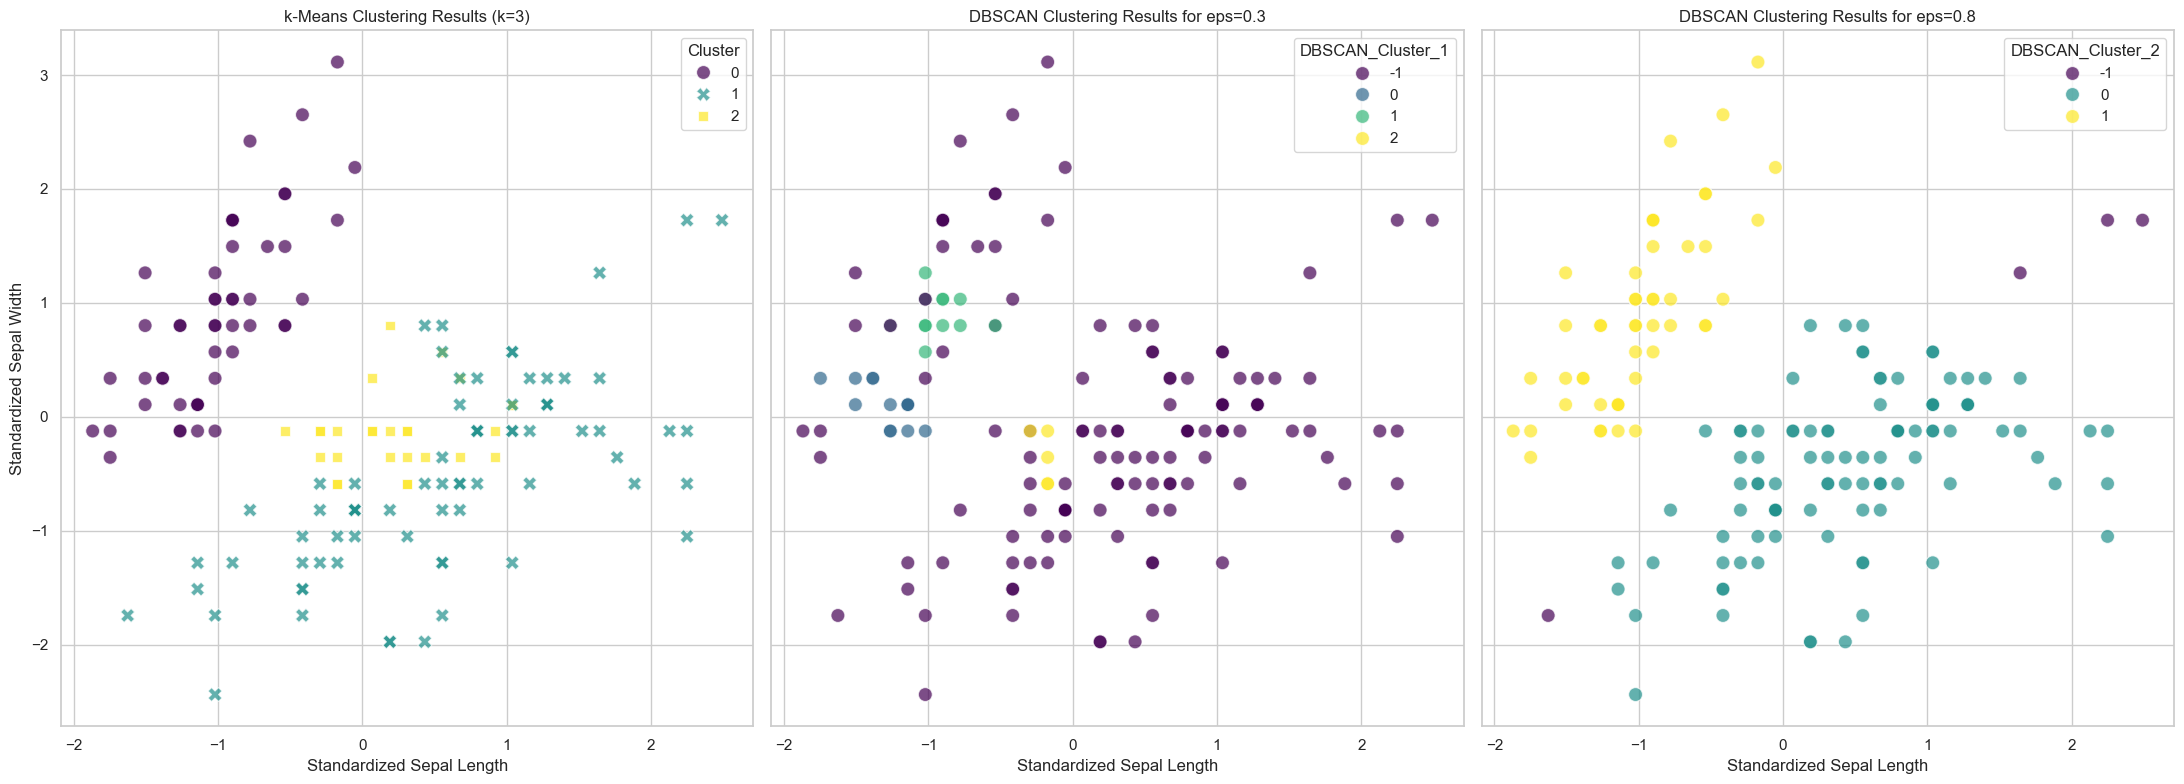

In [68]:
# Run DBSCAN twice on the standardized data for different values of epsilon
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

eps1=0.3
dbscan1 = DBSCAN(eps=eps1, min_samples=5)
iris_standardized['DBSCAN_Cluster_1'] = dbscan1.fit_predict(iris_standardized[feature_columns])

eps2=0.8
dbscan2 = DBSCAN(eps=eps2, min_samples=5)
iris_standardized['DBSCAN_Cluster_2'] = dbscan2.fit_predict(iris_standardized[feature_columns])


# Compare k-Means and DBSCAN results using side-by-side plots for all feature combinations
fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)

# k-Means clustering result plot
sns.scatterplot(
    ax=axes[0], x='sepal_length', y='sepal_width', data=iris_standardized,
    hue='Cluster', palette='viridis', style='Cluster', s=100, alpha=0.7
)
axes[0].set_title('k-Means Clustering Results (k=3)')
axes[0].set_xlabel('Standardized Sepal Length')
axes[0].set_ylabel('Standardized Sepal Width')


# DBSCAN clustering result plot for 1st value of eps
sns.scatterplot(
    ax=axes[1], x='sepal_length', y='sepal_width', data=iris_standardized,
    hue='DBSCAN_Cluster_1', palette='viridis', s=100, alpha=0.7
)
axes[1].set_title(f'DBSCAN Clustering Results for eps={eps1}')
axes[1].set_xlabel('Standardized Sepal Length')


# DBSCAN clustering result plot for 2nd value of eps
sns.scatterplot(
    ax=axes[2], x='sepal_length', y='sepal_width', data=iris_standardized,
    hue='DBSCAN_Cluster_2', palette='viridis', s=100, alpha=0.7
)
axes[2].set_title(f'DBSCAN Clustering Results for eps={eps2}')
axes[2].set_xlabel('Standardized Sepal Length')

plt.tight_layout()
plt.show()